In [311]:
import pandas
from matplotlib import pyplot
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy
from xgboost import XGBRegressor
from hyperopt import fmin

df = pandas.read_csv('/home/jouny/itmo/оптимизация/lab4/train.csv')
df = df.drop(['Id'], axis=1)
missing = df.isnull().sum()
df = df.drop([key for key in missing.keys() if missing[key]/len(missing) > 0], axis=1)
df = pandas.get_dummies(df)

In [312]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['SalePrice'], axis=1),
    df.SalePrice,
    test_size=0.3,
    random_state=42
)

lasso = Lasso().fit(x_train, y_train)
xgb = XGBRegressor().fit(x_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [313]:
def report(regressor, x_test, y_test, **kwargs):
    predicted = regressor.predict(x_test)
    mse = mean_squared_error(y_test, predicted)
    pyplot.subplot(1,2,1)
    pyplot.scatter(x_test.LotArea, predicted, **kwargs)
    pyplot.scatter(x_test.LotArea, y_test, color='blue')
    pyplot.title(type(regressor).__name__)
    pyplot.ylabel('SalePrice')
    pyplot.xlabel('LotArea')
    pyplot.subplot(1,2,2)
    pyplot.scatter(x_test['1stFlrSF'], predicted, **kwargs)
    pyplot.scatter(x_test['1stFlrSF'], y_test, color='blue')
    pyplot.title(type(regressor).__name__)
    pyplot.ylabel('SalePrice')
    pyplot.xlabel('1stFlrSF')
    print(f'Mean squared error {mse**.5}')

Populating the interactive namespace from numpy and matplotlib
Mean squared error 27134.552345485186
Mean squared error 26080.85170550353


/usr/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fmin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


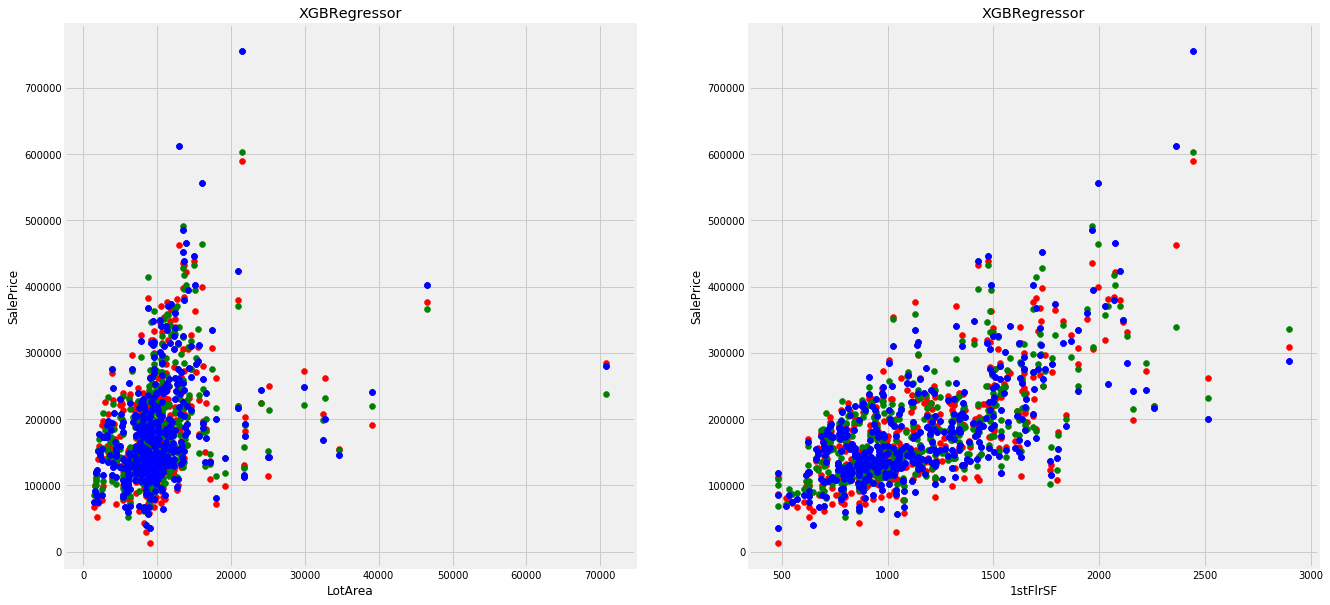

In [314]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)
report(lasso, x_test, y_test, color='red')
report(xgboost, x_test, y_test,color='green')